In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import scipy
import matplotlib.pyplot as plt

import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# NO Duplicate Values
data[data['Invoice ID'].duplicated()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [4]:
# No Null In First Observation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
print(data['Branch'].value_counts())
print('-----------------------------------------------------------------')
print(data['Customer type'].value_counts())
print('------------------------------------------------------------------')
print(data['Gender'].value_counts())
print('-----------------------------------------------------------------')
print(data['Product line'].value_counts())
print('------------------------------------------------------------------')
print(data['Payment'].value_counts())
print('-----------------------------------------------------------------')


A    340
B    332
C    328
Name: Branch, dtype: int64
-----------------------------------------------------------------
Member    501
Normal    499
Name: Customer type, dtype: int64
------------------------------------------------------------------
Female    501
Male      499
Name: Gender, dtype: int64
-----------------------------------------------------------------
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
------------------------------------------------------------------
Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64
-----------------------------------------------------------------


#sns.pairplot(data, hue='Rating')

In [6]:
data.select_dtypes(['float64', 'int64']).columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

(array([17., 17., 20., 21., 20., 17., 32., 18., 25., 21., 16., 11., 21.,
        24., 19., 19., 23., 12., 21., 19., 24., 20., 16., 27., 18., 21.,
        19., 16., 17., 17., 18., 19., 17., 13., 28., 31., 19., 24., 13.,
        22., 21., 10., 17., 24., 19., 14., 23., 18., 24., 38.]),
 array([10.08  , 11.8776, 13.6752, 15.4728, 17.2704, 19.068 , 20.8656,
        22.6632, 24.4608, 26.2584, 28.056 , 29.8536, 31.6512, 33.4488,
        35.2464, 37.044 , 38.8416, 40.6392, 42.4368, 44.2344, 46.032 ,
        47.8296, 49.6272, 51.4248, 53.2224, 55.02  , 56.8176, 58.6152,
        60.4128, 62.2104, 64.008 , 65.8056, 67.6032, 69.4008, 71.1984,
        72.996 , 74.7936, 76.5912, 78.3888, 80.1864, 81.984 , 83.7816,
        85.5792, 87.3768, 89.1744, 90.972 , 92.7696, 94.5672, 96.3648,
        98.1624, 99.96  ]),
 <BarContainer object of 50 artists>)

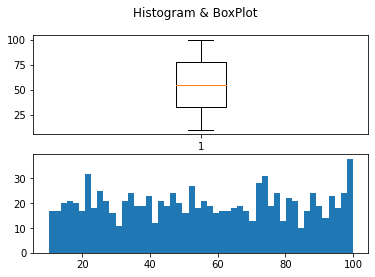

In [7]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Histogram & BoxPlot')
ax1.boxplot(data['Unit price'])
ax2.hist(data['Unit price'], bins= 50)

(array([112.,  91.,  90., 109., 102.,  98., 102.,  85.,  92., 119.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

<Figure size 720x720 with 0 Axes>

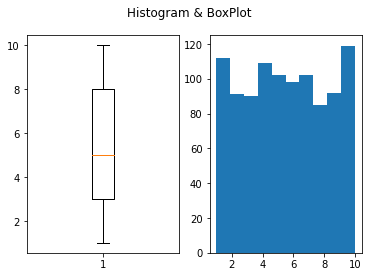

In [8]:
plt.figure(figsize=(10, 10))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histogram & BoxPlot')
ax1.boxplot(data['Quantity'])
ax2.hist(data['Quantity'])

(array([233., 215., 146., 110.,  91.,  68.,  45.,  51.,  25.,  16.]),
 array([ 0.5085 ,  5.42265, 10.3368 , 15.25095, 20.1651 , 25.07925,
        29.9934 , 34.90755, 39.8217 , 44.73585, 49.65   ]),
 <BarContainer object of 10 artists>)

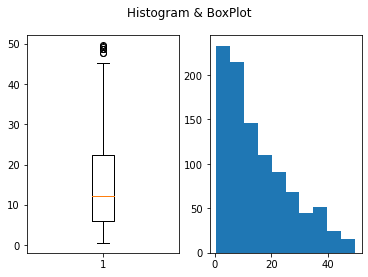

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histogram & BoxPlot')
ax1.boxplot(data['Tax 5%'])
ax2.hist(data['Tax 5%'])

(array([233., 215., 146., 110.,  91.,  68.,  45.,  51.,  25.,  16.]),
 array([  10.6785 ,  113.87565,  217.0728 ,  320.26995,  423.4671 ,
         526.66425,  629.8614 ,  733.05855,  836.2557 ,  939.45285,
        1042.65   ]),
 <BarContainer object of 10 artists>)

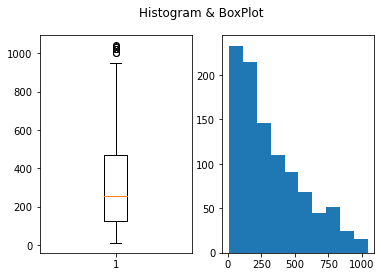

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histogram & BoxPlot')
ax1.boxplot(data['Total'])
ax2.hist(data['Total'])

(array([28., 22., 18., 17., 17., 20., 13., 18., 21., 21., 26., 14., 19.,
        16., 14., 31., 26., 14., 21., 15., 37., 24., 19., 13., 15., 36.,
        18., 18., 16., 13., 38., 15., 18., 21., 13., 25., 18., 18., 18.,
        20., 30., 15., 14., 16., 16., 34., 17., 14., 19., 21.]),
 array([ 4.  ,  4.12,  4.24,  4.36,  4.48,  4.6 ,  4.72,  4.84,  4.96,
         5.08,  5.2 ,  5.32,  5.44,  5.56,  5.68,  5.8 ,  5.92,  6.04,
         6.16,  6.28,  6.4 ,  6.52,  6.64,  6.76,  6.88,  7.  ,  7.12,
         7.24,  7.36,  7.48,  7.6 ,  7.72,  7.84,  7.96,  8.08,  8.2 ,
         8.32,  8.44,  8.56,  8.68,  8.8 ,  8.92,  9.04,  9.16,  9.28,
         9.4 ,  9.52,  9.64,  9.76,  9.88, 10.  ]),
 <BarContainer object of 50 artists>)

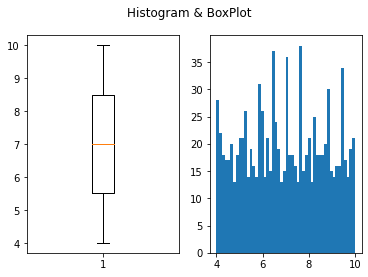

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Histogram & BoxPlot')
ax1.boxplot(data['Rating'])
ax2.hist(data['Rating'], bins=50)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


<AxesSubplot:ylabel='Frequency'>

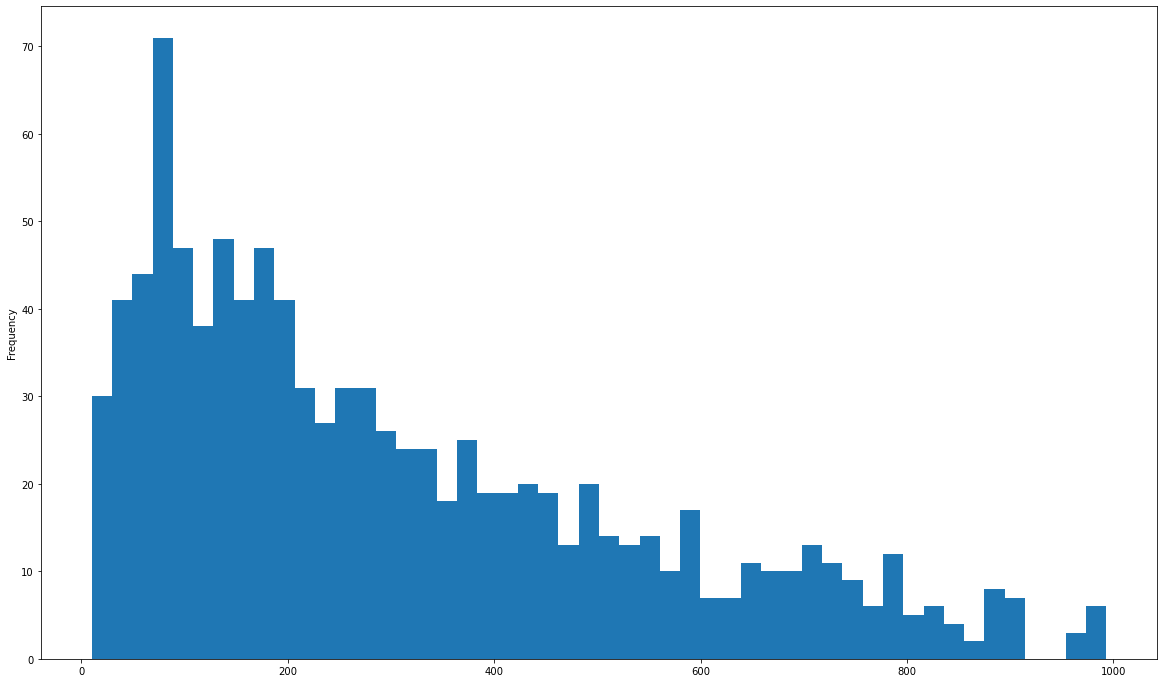

In [13]:
plt.figure(figsize=(20, 12))
data['cogs'].plot(kind='hist', bins=50)

In [14]:
index_cogs = data[data['cogs'] > 3 * data['cogs'].std() + 100 ].index
data_clean = data.drop(index_cogs, axis=0)

 # Data clean

<AxesSubplot:>

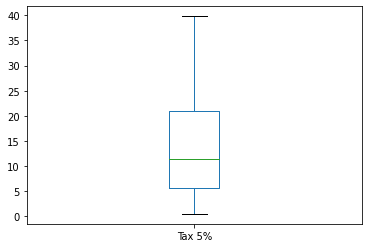

In [15]:
data_clean['Tax 5%'].plot(kind='box')

In [16]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,960.0,54.156146,2.592464e+01,10.080000,31.885000,53.255000,75.410000,99.960000
Quantity,960.0,5.337500,2.854601e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,960.0,14.172479,1.029716e+01,0.508500,5.654250,11.404500,21.029250,39.824000
Total,960.0,297.622052,2.162405e+02,10.678500,118.739250,239.494500,441.614250,836.304000
cogs,960.0,283.449573,2.059433e+02,10.170000,113.085000,228.090000,420.585000,796.480000
gross margin percentage,960.0,4.761905,6.131625e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,960.0,14.172479,1.029716e+01,0.508500,5.654250,11.404500,21.029250,39.824000
Rating,960.0,6.976458,1.715016e+00,4.000000,5.500000,7.000000,8.500000,10.000000


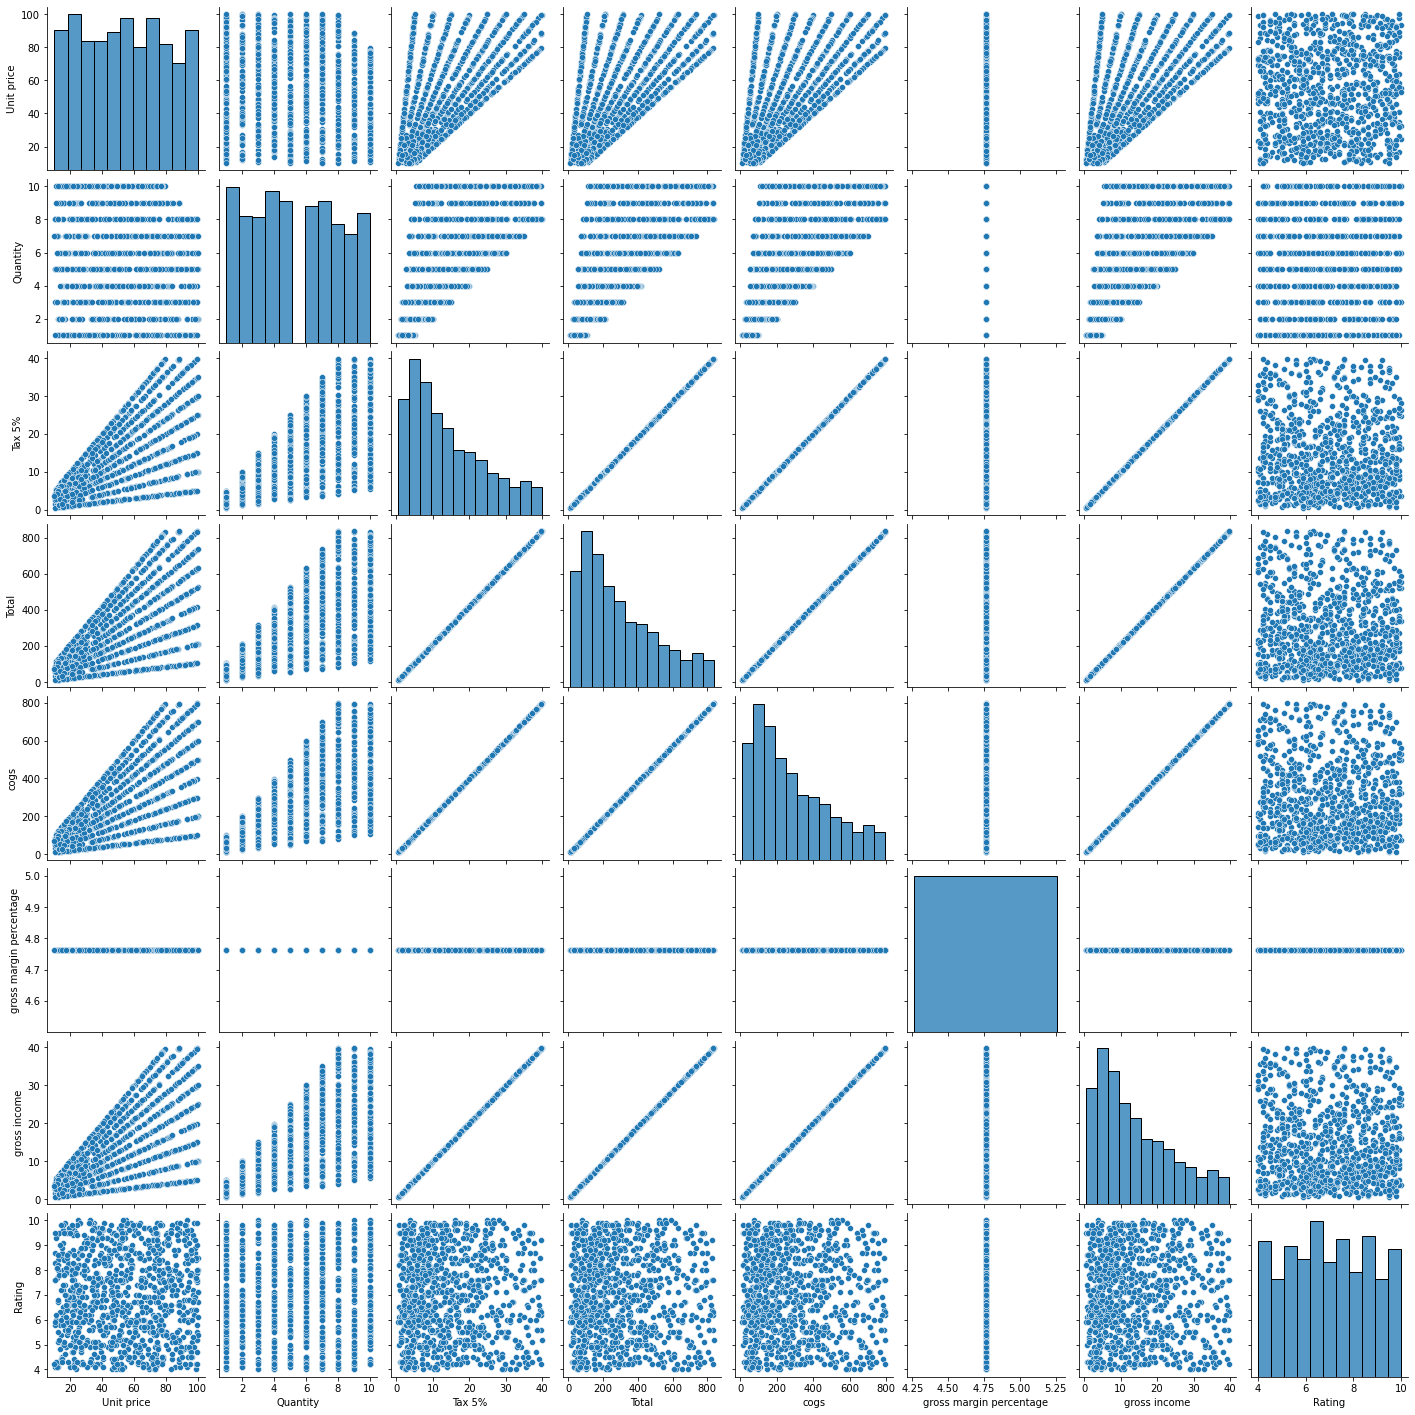

In [17]:
sns.pairplot(data_clean)

<AxesSubplot:>

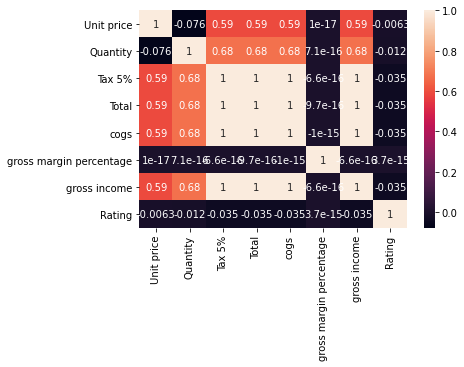

In [18]:
sns.heatmap(data_clean.corr(), annot=True)

In [19]:
data_clean['Date'] = pd.DatetimeIndex(data_clean['Date'])
data_clean

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [20]:
which_city_sale = data_clean.pivot_table(index = 'City', columns = 'Product line', values = 'cogs', aggfunc = 'sum')
which_city_sale

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,15341.90,14799.23,13644.07,16449.72,14765.99,17324.22
Naypyitaw,16422.59,16843.62,17262.03,13253.52,11303.06,11450.13
Yangon,16558.17,14564.97,14645.77,11997.86,18794.68,16690.06


<AxesSubplot:xlabel='City'>

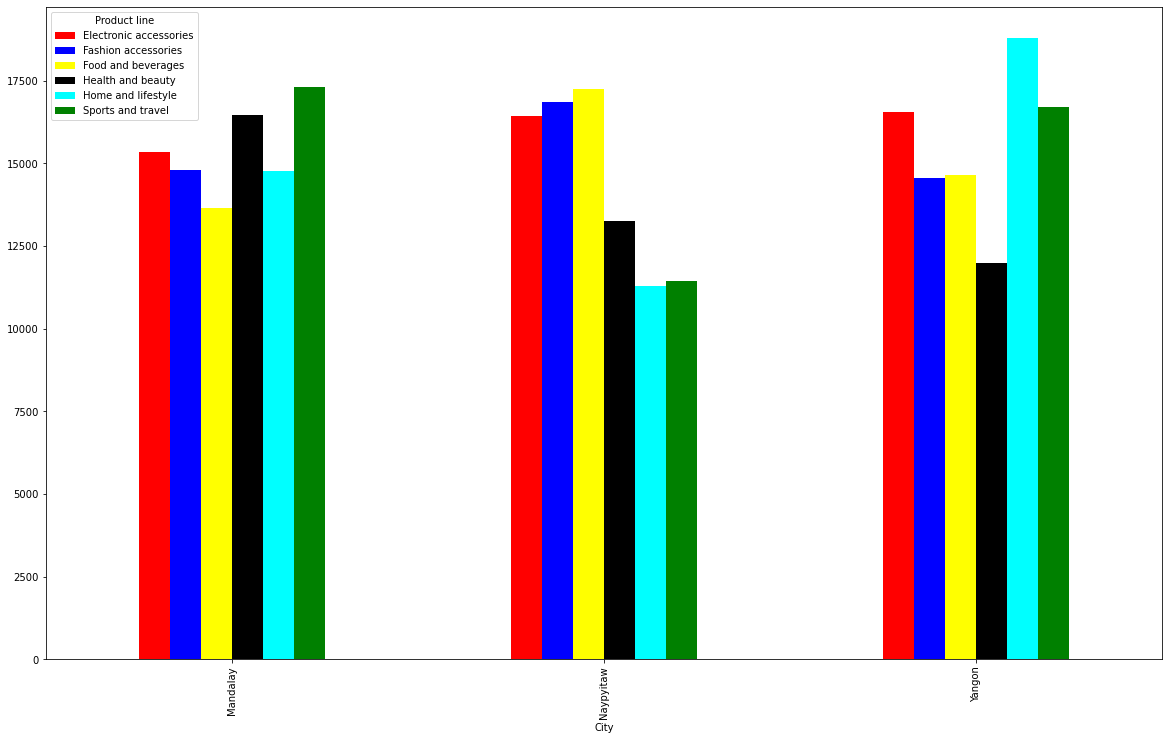

In [21]:
which_city_sale.plot(kind='bar', align='center', figsize=(20, 12), color=['red', 'blue', 'yellow', 'black' ,'cyan', 'green'])

C:\Users\dstat\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


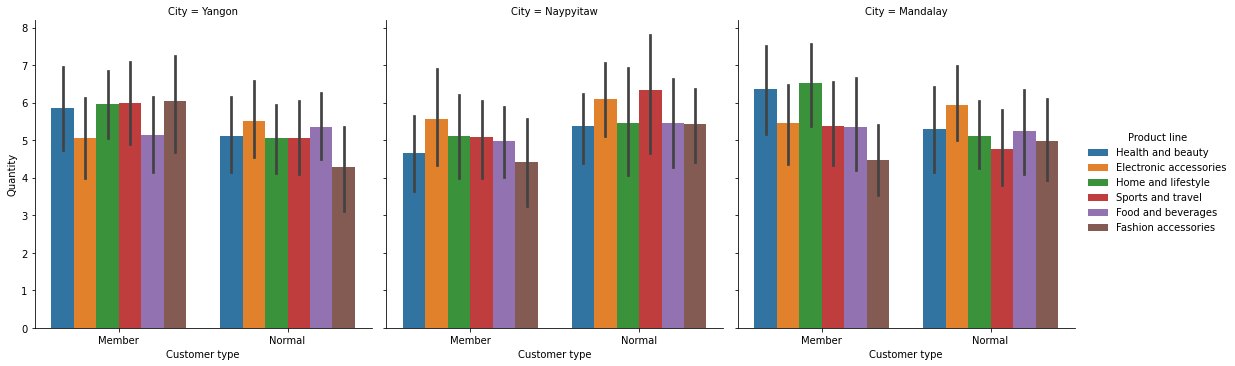

In [24]:
sns.factorplot(x = 'Customer type', y = 'Quantity', hue='Product line', col = 'City', data=data_clean, kind='bar')

In [23]:
data_clean['month'] = pd.DatetimeIndex(data_clean['Date']).month

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x864 with 0 Axes>

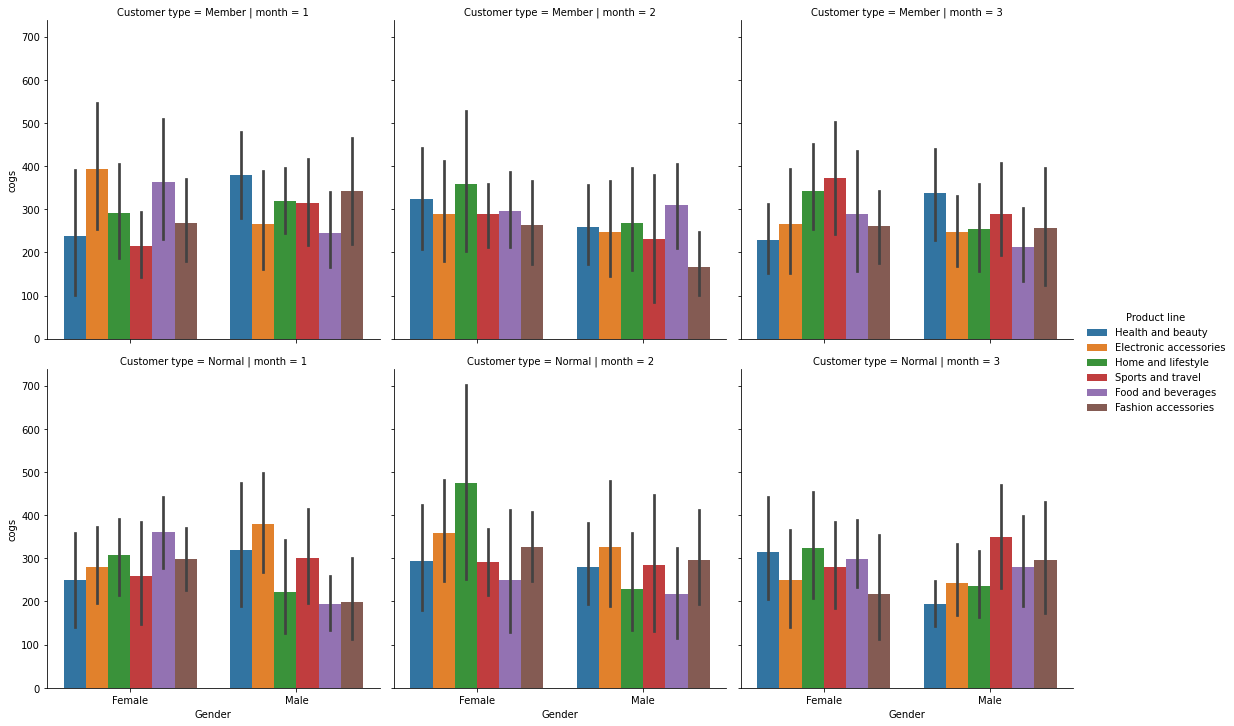

In [24]:
plt.figure(figsize=(20, 12))
sns.factorplot(x = 'Gender', y = 'cogs', hue = 'Product line', col = 'month', kind='bar',row = 'Customer type' ,data = data_clean)

In [25]:
data_clean = data_clean.sort_values(by='Date').reset_index(drop=True)

In [26]:
data_clean

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,month
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10:39,Credit card,435.66,4.761905,21.783,6.9,1
1,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0,1
2,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,2019-01-01,11:40,Ewallet,175.32,4.761905,8.766,5.0,1
3,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9,1
4,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5,3
956,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4,3
957,131-15-8856,C,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.008,609.168,2019-03-30,19:26,Credit card,580.16,4.761905,29.008,4.0,3
958,642-61-4706,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.340,196.140,2019-03-30,16:34,Cash,186.80,4.761905,9.340,5.5,3


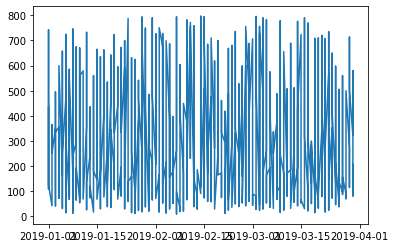

In [26]:
plt.plot(data_clean['Date'], data_clean['cogs'])

In [27]:
adfuller(data_clean['cogs'])

(-30.386992366626743,
 0.0,
 0,
 959,
 {'1%': -3.43718721587049,
  '5%': -2.8645585177815187,
  '10%': -2.568377225331392},
 12653.73788148212)

In [29]:
data_clean['cogs'] = data_clean['cogs'].diff()
data_clean = data_clean.drop(0, axis=0)

In [28]:
adfuller(data_clean['cogs'])

(-30.386992366626743,
 0.0,
 0,
 959,
 {'1%': -3.43718721587049,
  '5%': -2.8645585177815187,
  '10%': -2.568377225331392},
 12653.73788148212)

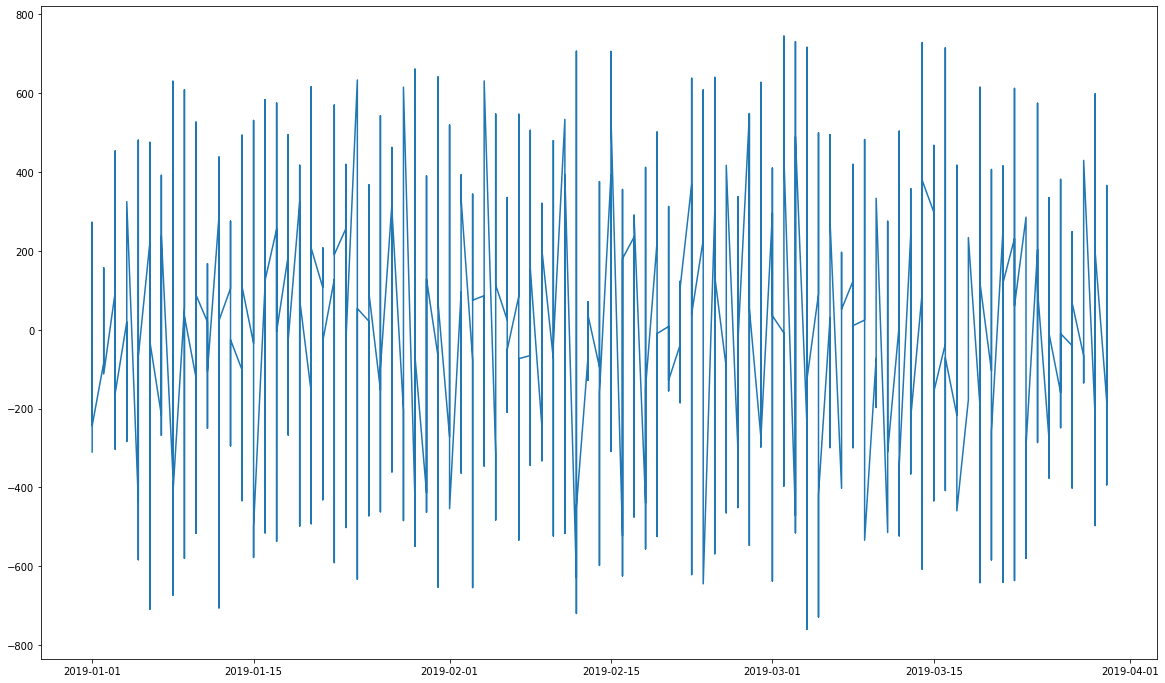

In [31]:
plt.figure(figsize=(20, 12))
plt.plot(data_clean['Date'].sort_values(), data_clean['cogs'])

In [29]:
m  = SARIMAX(data_clean['cogs'], order = (3, 1, 3), seasonal_order=(3, 1, 3, 6))
res = m.fit()

C:\Users\dstat\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              cogs   No. Observations:                  960
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 6)   Log Likelihood               -6454.257
Date:                           Sun, 28 Mar 2021   AIC                          12934.514
Time:                                   09:13:18   BIC                          12997.689
Sample:                                        0   HQIC                         12958.581
                                           - 960                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9670      0.031    -63.486      0.000      -2.028      -1.906
ar.L2         -0.9362      0.062    -15.091      0.000      -1.058      -0.815
ar.L3          0.0318      0.031      1.022      0.307      -0.029       0.093
ma.L1          0.9982      0.845      1.182      0.237      -0.658       2.654
ma.L2         -0.9989      1.690     -0.591      0.554      -4.310       2.313
ma.L3         -0.9992      0.846     -1.181      0.238      -2.658       0.659
ar.S.L6       -1.9040      0.051    -37.532      0.000      -2.003      -1.805
ar.S.L12      -0.8885      0.072    -12.295      0.000      -1.030      -0.747
ar.S.L18       0.0549      0.032      1.717      0.086      -0.008       0.118
ma.S.L6        0.9607      0.855      1.124      0.261      -0.715       2.636
ma.S.L12      -0.9635      1.665     -0.579      0.563      -4.228       2.301
ma.S.L18      -0.9967      0.851     -1.172      0.241      -2.664       0.671
sigma2      4.049e+04      0.000   3.13e+08      0.000    4.05e+04    4.05e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                80.45
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.67
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.85e+24. Standard errors may be unstable.
"""

In [31]:
data_clean['arima_predict'] = res.fittedvalues

No handles with labels found to put in legend.


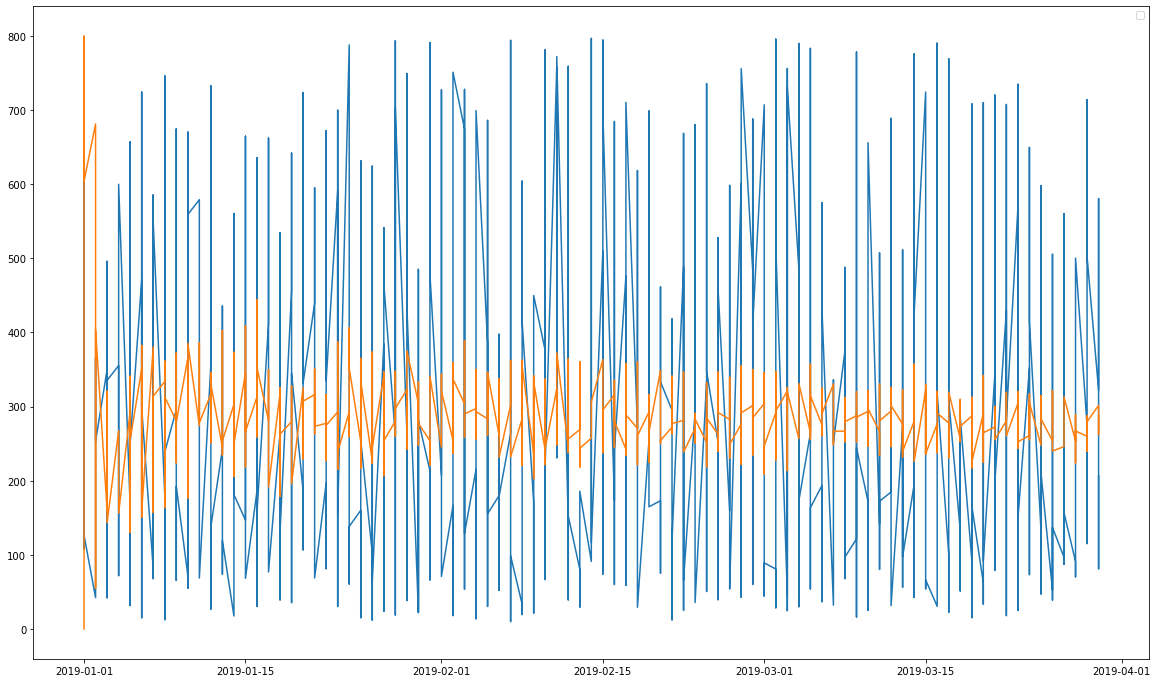

In [32]:
plt.figure(figsize=(20, 12))
plt.plot(data_clean['Date'].sort_values(), data_clean['cogs'])
plt.plot(data_clean['Date'].sort_values(), data_clean['arima_predict'])
plt.legend()

In [33]:
forecast = res.predict(start=len(data_clean), end=len(data_clean) + 15)

In [34]:
forecast

960    255.278169
961    264.354914
962    299.305246
963    318.509127
964    229.403812
965    297.105020
966    256.088702
967    279.201749
968    272.385649
969    280.417834
970    260.099597
971    276.987615
972    258.090580
973    281.155857
974    281.104171
975    314.218988
Name: predicted_mean, dtype: float64

In [35]:
len(data_clean['arima_predict'])

960

In [36]:
data_clean['cogs'].append(forecast)

0      435.660000
1      125.740000
2      175.320000
3      108.160000
4      380.720000
          ...    
971    276.987615
972    258.090580
973    281.155857
974    281.104171
975    314.218988
Length: 976, dtype: float64

No handles with labels found to put in legend.


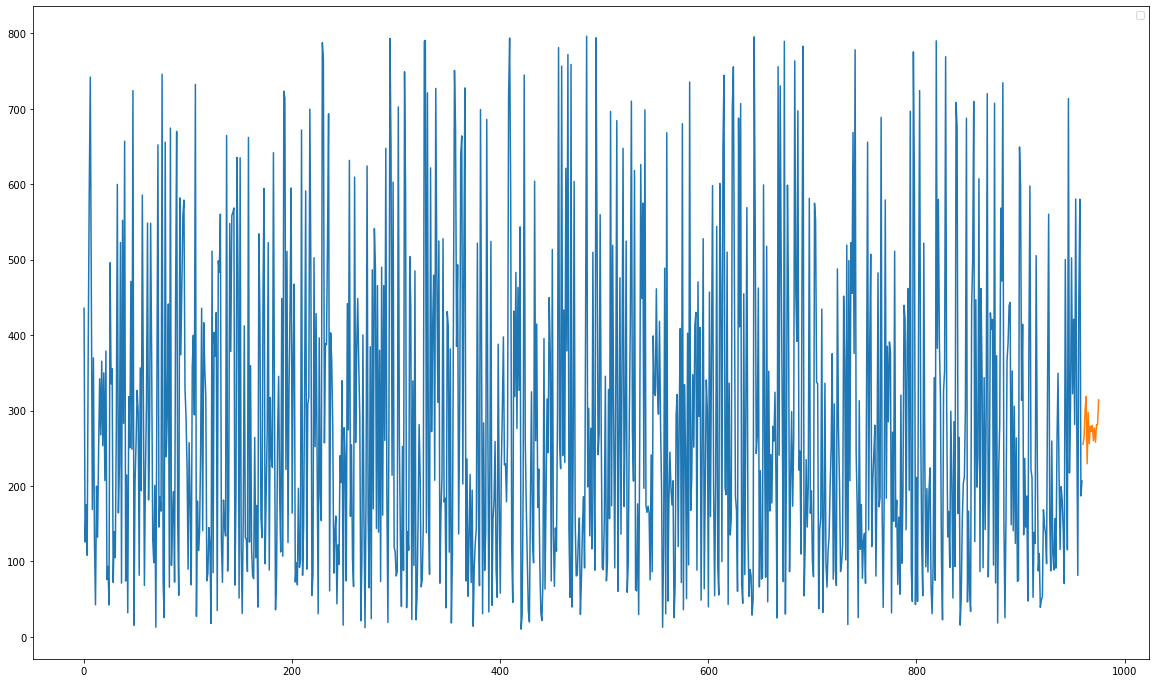

In [37]:
plt.figure(figsize=(20, 12))
plt.plot(data_clean['cogs'])
plt.plot(forecast)
plt.legend()

In [38]:
data_clean = data.drop(index_cogs, axis=0)

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pytesseract
%matplotlib inline

In [40]:
# First let's see the name of the images and explore the directory
filenames = os.listdir('image/')
print(filenames)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'image/'

<class 'numpy.ndarray'>
1999 1413 3


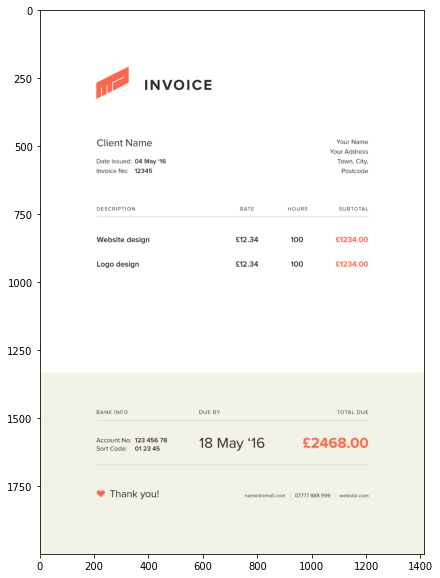

In [45]:
# Let's start with a simple image
img = cv2.imread("image/1.png") # image in BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = [10,10])
height,width,channel = img.shape
plt.imshow(img)

print(type(img))
print(height,width,channel)

In [59]:
from PIL import Image
import numpy as np
import sys
import os
import csv

#Useful function
def createFileList(myDir, format='one.png'):
    fileList = []
    print(myDir)
    for root, dirs, files in os.walk(myDir, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
    return fileList

# load the original image
myFileList = createFileList(one.png)

for file in myFileList:
    print(file)
    img_file = Image.open(file)
    # img_file.show()

    # get original image parameters...
    width, height = img_file.size
    format = img_file.format
    mode = img_file.mode

    # Make image Greyscale
    img_grey = img_file.convert('L')
    #img_grey.save('result.png')
    #img_grey.show()

    # Save Greyscale values
    value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
    value = value.flatten()
    print(value)
    with open("img_pixels.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)

NameError: name 'one' is not defined